<a href="https://colab.research.google.com/github/Semanti20/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!pip install nltk
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/Reviews.csv')


In [ ]:
print(df.shape)

(16243, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


**EDA**

In [ ]:
import matplotlib.pyplot as plt

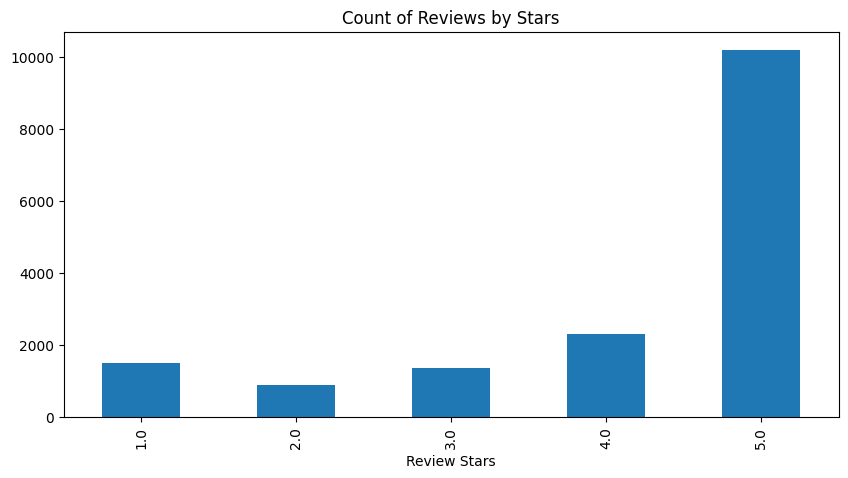

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

**TEXT PROCESSING**

In [ ]:
example = df['Text'][43]
print(example)

McCann's Oatmeal is a good quality choice.  Our favorite is the Apples and Cinnamon, but we find that none of these are overly sugary.  For a good hot breakfast in 2 minutes, this is excellent.


**TOKENIZATION**

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_example = word_tokenize(example)
print(tokenized_example)


['McCann', "'s", 'Oatmeal', 'is', 'a', 'good', 'quality', 'choice', '.', 'Our', 'favorite', 'is', 'the', 'Apples', 'and', 'Cinnamon', ',', 'but', 'we', 'find', 'that', 'none', 'of', 'these', 'are', 'overly', 'sugary', '.', 'For', 'a', 'good', 'hot', 'breakfast', 'in', '2', 'minutes', ',', 'this', 'is', 'excellent', '.']


**REMOVING STOP WORDS**

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
filtered_example = [word for word in tokenized_example if word.lower() not in stop_words]
print(filtered_example)

['McCann', "'s", 'Oatmeal', 'good', 'quality', 'choice', '.', 'favorite', 'Apples', 'Cinnamon', ',', 'find', 'none', 'overly', 'sugary', '.', 'good', 'hot', 'breakfast', '2', 'minutes', ',', 'excellent', '.']


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
def clean_and_tokenize(text):
    if isinstance(text, float):
        text = str(text)

    tokenized_text = word_tokenize(text.lower())
    filtered_text = [word for word in tokenized_text if word.lower() not in stop_words]
    return filtered_text

**CREATING A NEW COLUMN FOR CLEANED TEXT**

In [ ]:
df['Clean_Text'] = df['Text'].apply(clean_and_tokenize)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...,"[confection, around, centuries, ., light, ,, p..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffy, great, price, ., wide, assortme..."


**CREATING A SENTIMENT ANALYSIS COLUMN**

In [ ]:
def calculate_sentiment(tokens):
    sentiment = TextBlob(" ".join(tokens)).sentiment.polarity
    return sentiment
df['Sentiment'] = df['Clean_Text'].apply(calculate_sentiment)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,...",0.425000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0.216667
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...,"[confection, around, centuries, ., light, ,, p...",0.187000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",0.150000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffy, great, price, ., wide, assortme...",0.458333


**DISTRIBUTION OF SENTIMENT SCORE**

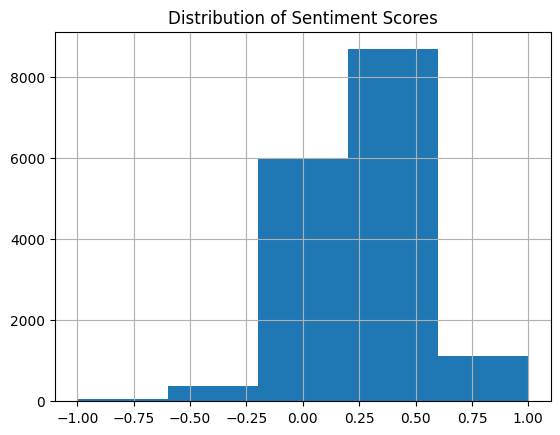

In [ ]:
import matplotlib.pyplot as plt
df['Sentiment'].hist(bins=5)
plt.title('Distribution of Sentiment Scores')
plt.show()

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2)

**MODEL TRAINING**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
X_train = X_train.astype(str)
X_test = X_test.astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_sequences = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_sequences, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test_sequences, y_test)
print('Test Accuracy:', accuracy)

predicted_sentiment = model.predict(X_test_sequences)

Epoch 1/10
407/407 [==============================] - 146s 349ms/step - loss: 0.5150 - accuracy: 0.0189
Epoch 2/10
407/407 [==============================] - 149s 365ms/step - loss: 0.4210 - accuracy: 0.0211
Epoch 3/10
407/407 [==============================] - 147s 361ms/step - loss: 0.3638 - accuracy: 0.0215
Epoch 4/10
407/407 [==============================] - 146s 358ms/step - loss: 0.1468 - accuracy: 0.0195
Epoch 5/10
407/407 [==============================] - 148s 363ms/step - loss: -0.0954 - accuracy: 0.0214
Epoch 6/10
407/407 [==============================] - 149s 365ms/step - loss: -0.1024 - accuracy: 0.0220
Epoch 7/10
407/407 [==============================] - 149s 365ms/step - loss: -0.4168 - accuracy: 0.0216
Epoch 8/10
407/407 [==============================] - 151s 371ms/step - loss: -0.8054 - accuracy: 0.0225
Epoch 9/10
407/407 [==============================] - 146s 360ms/step - loss: -0.9540 - accuracy: 0.0232
Epoch 10/10
102/102 [==============================] - 4s 3

**CONFUSION MATRIX**

102/102 [==============================] - 4s 42ms/step
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       1.00      0.91      0.95      3228
           1       0.03      0.40      0.05        20

    accuracy                           0.91      3249
   macro avg       0.34      0.44      0.34      3249
weighted avg       0.99      0.91      0.95      3249



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


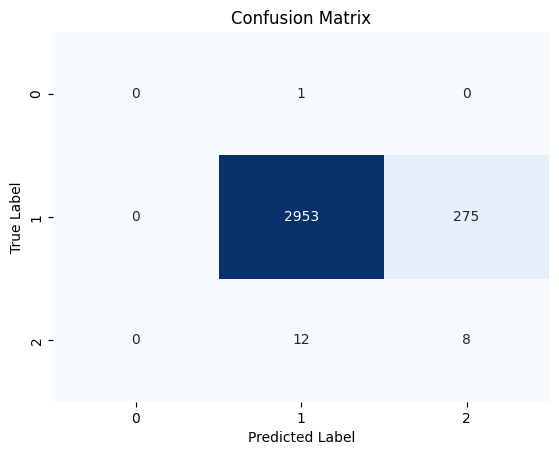

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = model.predict(X_test_sequences)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**MODEL** **EVALUATION**

In [ ]:
def predict_sentiment(text):

  cleaned_text = clean_and_tokenize(text)
  sequence = tokenizer.texts_to_sequences([cleaned_text])
  padded_sequence = pad_sequences(sequence, maxlen=100)
  prediction = model.predict(padded_sequence)
  sentiment_score = TextBlob(text).sentiment.polarity
  if prediction > 0.5:
    print("Positive")
  else:
    print("Negative")

  print("Sentiment Score:", sentiment_score)

text = input("Enter a statement: ")
predict_sentiment(text)

Enter a statement: My order arrived late and was completely different from what I ordered. The customer service was unhelpful and rude.
1/1 [==============================] - 0s 43ms/step
Negative
Sentiment Score: -0.19999999999999998
